<h1><center>Laboratory work 3.</center></h1>
<h2><center>PyTorch Classification Exercises</center></h2>

**Виконав:** Last name and First name

**Варіант:** #__

<a class="anchor" id="3"></a>

## Content

1. [Task 1. Make a binary classification dataset with a Scikit-Learn's function.](#3.1)
2. [Task 2. Build a model by subclassing `nn.Module`.](#3.2)
3. [Task 3. Setup a binary classification compatible loss function and optimizer.](#3.3)
4. [Task 4. Create a training and testing loop to fit the model you created in Task 2 to the data you created in Task 1.](#3.4)
5. [Task 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function predefined in this notebook.](#3.5)
6. [Task 6. Replicate an activation function in pure PyTorch.](#3.6)
7. [Task 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).](#3.7)

In [1]:
# Import torch
import torch

# Setup device agnostic code


# Setup random seed
RANDOM_SEED = 42

C:\Users\radiu\anaconda3\envs\courses\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<a class="anchor" id="3.1"></a>

## <span style="color:blue; font-size:1em;"> Task 1. Make a binary classification dataset with a Scikit-Learn's function.</span>

[Go back to the content](#3)

**For variants 1-3:** Create a Binary Classification Dataset with Blobs
* Use Scikit-Learn's `make_blobs()` function to create a binary classification dataset with 1000 samples, 2 features, and 2 centers. Set random_state=42 for consistency.
* Convert the dataset into PyTorch tensors using `torch.from_numpy()`.
* Split the dataset into training and test sets using `train_test_split()` with an 80-20 split.

**For variants 4-6:** Create a Binary Classification Dataset with Circles
* Use Scikit-Learn's `make_circles()` function to create a binary classification dataset with 1000 samples and a random_state=42.
* Convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets with an 80-20 split using `train_test_split()`.

**For variants 7-9:** Create a Binary Classification Dataset with Linearly Separable Data
* Use NumPy to generate two sets of linearly separable points in 2D space.
* Label one set as class 0 and the other as class 1, and combine them into a single dataset.
* Convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets using an 80-20 split.

**For variants 10-12:** Create a Binary Classification Dataset with Overlapping Classes
* Use Scikit-Learn's `make_classification()` function to create a dataset with 1000 samples, 2 features, and 2 classes with some overlap.
* Convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets with an 80-20 split.

**For variants 13-15:** Create a Binary Classification Dataset with Interleaved Spirals
* Use a custom function to generate two interleaved spirals, one for each class.
* Label the points in one spiral as class 0 and the other as class 1.
* Convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets using an 80-20 split.

**For variants 16-18:** Create a Binary Classification Dataset with Gaussian Distributions
* Use Scikit-Learn's `make_gaussian_quantiles()` function to create a dataset with two Gaussian-distributed clusters.
* Convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets with an 80-20 split.

**For variants 19-21:** Create a Binary Classification Dataset with Concentric Circles
* Use a custom function to generate two sets of points in 2D space forming concentric circles, one for each class.
* Label the points in the inner circle as class 0 and the outer circle as class 1.
* Convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets using an 80-20 split.

**For variants 22-24:** Create a Binary Classification Dataset with Imbalanced Classes
* Use Scikit-Learn's `make_classification()` function to create a dataset with 1000 samples, 2 features, and 2 classes, with one class significantly outnumbering the other (e.g., a 70-30 split).
* Convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets with an 80-20 split.

**For variants 25-27:** Create a Binary Classification Dataset with XOR Pattern
* Use NumPy to generate points in 2D space that form an XOR pattern, with two classes that are not linearly separable.
* Label the points accordingly and convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets using an 80-20 split.

**For variants 28-30:** Create a Binary Classification Dataset with Two Intersecting Lines
* Generate two sets of points forming intersecting lines in 2D space, one for each class.
* Label the points based on which line they belong to and convert the dataset into PyTorch tensors.
* Split the dataset into training and test sets with an 80-20 split.

In [2]:
# Create a dataset with Scikit-Learn's function
# In this example, we use `make_moons()`
from sklearn.datasets import make_moons

In [3]:
# Turn data into a DataFrame
import pandas as pd


In [4]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt


In [5]:
# Turn data into tensors of dtype float


# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split


<a class="anchor" id="3.2"></a>

## <span style="color:blue; font-size:1em;"> Task 2. Build a model by subclassing `nn.Module`.</span>

[Go back to the content](#3)

**For variants 1-3:** Build a Model with LeakyReLU Activation
* Subclass `nn.Module` to create a model with two linear layers.
* Use LeakyReLU as the activation function between the linear layers to introduce non-linearity.
* The output layer should have a single neuron for binary classification.

**For variants 4-6:** Build a Model with ELU Activation
* Subclass `nn.Module` to create a model with three linear layers.
* Use ELU (Exponential Linear Unit) as the activation function between the layers.
* The final layer should output a single neuron for binary classification.

**For variants 7-9:** Build a Model with Multiple Non-Linear Layers
* Subclass `nn.Module` to create a model with three linear layers.
* Use a combination of ReLU and Sigmoid activation functions between the linear layers.
* The output layer should have a single neuron for binary classification.

**For variants 10-12:** Build a Model with Dropout for Regularization
* Subclass `nn.Module` to create a model with two linear layers.
* Use ReLU as the activation function and add a Dropout layer with a dropout rate of 0.5 to prevent overfitting.
* The output layer should have a single neuron for binary classification.

**For variants 13-15:** Build a Model with Batch Normalization
* Subclass `nn.Module` to create a model with two linear layers.
* Add a Batch Normalization layer after the first linear layer to normalize the input for the next layer.
* Use ReLU as the activation function between the layers.
* The output layer should have a single neuron for binary classification.

**For variants 16-18:** Build a Model with Residual Connections
* Subclass `nn.Module` to create a model with three linear layers.
* Incorporate residual connections by adding the input of the first layer to the output of the second layer before applying the final activation function.
* Use ReLU as the activation function between the layers.

**For variants 19-21:** Build a Model with Convolutional Layers
* Subclass `nn.Module` to create a model with one convolutional layer followed by a max pooling layer.
* Add a linear layer after the pooling layer to reduce the dimensionality.
* Use ReLU as the activation function between the layers.
* The output layer should have a single neuron for binary classification.

**For variants 22-24:** Build a Model with Attention Mechanism
* Subclass `nn.Module` to create a model with a simple self-attention mechanism to weigh the importance of different features.
* Use linear layers to transform the input features before applying the attention mechanism.
* Use a softmax function to normalize the attention weights.
* Combine the weighted features and pass them through additional linear layers for classification.

**For variants 25-27:** Build a Model with Dilated Convolutional Layers
* Subclass `nn.Module` to create a model that includes one or more dilated convolutional layers to increase the receptive field without increasing the number of parameters.
* Use pooling layers and linear layers to reduce the dimensionality and produce a binary classification output.

**For variants 28-30:** Build a Model with Recurrent Layers
* Subclass `nn.Module` to create a model that includes a recurrent layer, such as an LSTM or GRU, to process the input data in a sequential manner.
* Add linear layers after the recurrent layer to produce a binary classification output.

In [6]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##

    def forward(self, x):
        ## Your code here ##
        return 

# Instantiate the model
## Your code here ##

<a class="anchor" id="3.3"></a>

## <span style="color:blue; font-size:1em;"> Task 3. Setup a binary classification compatible loss function and optimizer.</span>

[Go back to the content](#3)

**For variants 1-3:** Utilize BCEWithLogitsLoss and Adam Optimizer
* Set up the loss function as `nn.BCEWithLogitsLoss()` for binary classification.
* Use the Adam optimizer with a learning rate of 0.001 to train the model.

**For variants 4-6:** Utilize CrossEntropyLoss and RMSprop Optimizer
* Use `nn.CrossEntropyLoss()` as the loss function, which combines LogSoftmax and NLLLoss.
* Opt for the RMSprop optimizer with a learning rate of 0.01 to train the model.

**For variants 7-9:** Utilize SmoothL1Loss and Adagrad Optimizer
* Set up the loss function as `nn.SmoothL1Loss()` for binary classification, which is less sensitive to outliers than the traditional L1 loss.
* Use the Adagrad optimizer with a learning rate of 0.01 to train the model, which adapts the learning rate for each parameter.

**For variants 10-12:** Utilize Hinge Embedding Loss and RMSprop Optimizer
* Use `nn.HingeEmbeddingLoss()` as the loss function, which is commonly used for learning nonlinear embeddings or for binary classification tasks.
* Opt for the RMSprop optimizer with a learning rate of 0.001 to train the model.

**For variants 13-15:** Utilize MSELoss and Adadelta Optimizer
* Set up the loss function as `nn.MSELoss()` for binary classification, treating the problem as a regression task.
* Use the Adadelta optimizer with default parameters to train the model, which adapts the learning rate based on a moving window of gradient updates.

**For variants 16-18:** Utilize BCELoss and Adamax Optimizer
* Use `nn.BCELoss()` as the loss function for binary classification, which expects the input to be probabilities obtained after applying a sigmoid function.
* Opt for the Adamax optimizer, a variation of the Adam optimizer that can be more stable in some cases.

**For variants 19-21:** Utilize Triplet Margin Loss and Nesterov Accelerated Gradient (NAG) Optimizer
* Set up the loss function as `nn.TripletMarginLoss()` for learning embeddings in a way that separates classes.
* Use the Nesterov Accelerated Gradient (NAG) optimizer with a learning rate of 0.01 to train the model, which can lead to faster convergence.

**For variants 22-24:** Utilize Cosine Embedding Loss and Adabelief Optimizer
* Use `nn.CosineEmbeddingLoss()` as the loss function for learning similarities between embeddings.
* Opt for the Adabelief optimizer, which adapts the learning rate based on the belief in the current gradient direction.

**For variants 25-27:** Utilize Quadratic Loss and AdaMax Optimizer
* Set up the loss function as a custom quadratic loss function for binary classification.
* Use the AdaMax optimizer, a variation of the Adam optimizer that uses infinity norm, to train the model.

**For variants 28-30:** Utilize LogCosh Loss and Yogi Optimizer
* Use a custom LogCosh loss function, which is smoother than L2 loss and less sensitive to outliers.
* Opt for the Yogi optimizer, an adaptive optimizer that adjusts the learning rate based on the sign of the gradient.

In [7]:
# Setup loss function

# Setup optimizer to optimize model's parameters

<a class="anchor" id="3.4"></a>

## <span style="color:blue; font-size:1em;"> Task 4. Create a training and testing loop to fit the model you created in Task 2 to the data you created in Task 1.</span>

[Go back to the content](#3)

**For all variants:**  
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

**For variants 1-3:** Training Loop with Early Stopping
* Implement a training loop with forward pass, backward pass, and optimizer step.
* Include early stopping based on validation loss to prevent overfitting.
* Report training and validation accuracy every 10 epochs.

**For variants 4-6:** Training Loop with Learning Rate Scheduler
* Implement a training loop with a learning rate scheduler to adjust the learning rate dynamically.
* Use torch.optim.lr_scheduler.StepLR to decrease the learning rate by a factor of 0.1 every 30 epochs.
* Output training and test set loss and accuracy every 10 epochs.

**For variants 7-9:** Training Loop with Weight Decay Regularization
* Implement a training loop with an optimizer that includes weight decay regularization (e.g., torch.optim.AdamW) to prevent overfitting.
* Report training and validation accuracy and loss every 10 epochs.
* Include a condition to stop training if the validation loss increases for a certain number of consecutive epochs.

**For variants 10-12:** Training Loop with Gradient Clipping
* Implement a training loop that includes gradient clipping to prevent exploding gradients, which can be done using torch.nn.utils.clip_grad_norm_.
* Output training and test set loss and accuracy every 10 epochs.
* Train the model for a sufficient number of epochs to achieve the desired accuracy.
* Implement a training loop that logs custom metrics, such as precision and recall, in addition to loss and accuracy.
* Report these metrics every 10 epochs to monitor the model's performance.
* Include a condition to save the model checkpoint if there is an improvement in the validation metrics.

**For variants 16-18:** Training Loop with TensorBoard Integration
* Integrate TensorBoard into the training loop to log metrics and visualize the training process in real-time.
* Use SummaryWriter to log training and validation loss and accuracy.
* Include histograms of model parameters and gradients to monitor the training dynamics.

**For variants 19-21:** Training Loop with Custom Learning Rate Scheduler
* Implement a training loop with a custom learning rate scheduler that reduces the learning rate by a factor of 0.5 if the validation loss does not improve for 5 consecutive epochs.
* Log training and validation loss and accuracy every 10 epochs.
* Include model checkpointing based on validation accuracy.

**For variants 22-24:** Training Loop with Model Pruning
* Integrate model pruning into the training loop to reduce the model's complexity and potentially improve generalization.
* Use torch.nn.utils.prune to apply pruning techniques like L1 unstructured pruning after a certain number of epochs.
* Monitor the impact of pruning on training and validation metrics.

**For variants 25-27:** Training Loop with Gradient Accumulation
* Implement a training loop that uses gradient accumulation to effectively handle large batch sizes that might not fit in memory.
* Update the model parameters only after accumulating gradients over several mini-batches.
* Report training and validation metrics every 10 epochs.

**For variants 28-30:** Training Loop with Mixed Precision Training
* Integrate mixed precision training into the training loop using PyTorch's automatic mixed precision (AMP) to reduce memory usage and potentially speed up training.
* Use a context manager to enable AMP for the forward and backward passes.
* Monitor training and validation metrics and adjust the training process as needed.

In [8]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
## Your code here ##

# Prediction probabilities
print("Pred probs:")
## Your code here ##

# Prediction labels
print("Pred labels:")
## Your code here ##

Logits:
Pred probs:
Pred labels:


In [9]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
# acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
# acc_fn

C:\Users\radiu\anaconda3\envs\courses\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [10]:
## TODO: Uncomment this to set the seed
# torch.manual_seed(RANDOM_SEED)

# Setup epochs


# Send data to the device


# Loop through the data
# for epoch in range(epochs):
  ### Training
  

  # 1. Forward pass (logits output)
  
  # Turn logits into prediction probabilities
  

  # Turn prediction probabilities into prediction labels
  

  # 2. Calculaute the loss
  # loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  # acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  

  ### Testing
  # model_0.eval() 
  # with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    
    # Turn the test logits into prediction labels
    

    # 2. Caculate the test loss/acc
    

  # Print out what's happening every 100 epochs
  # if epoch % 100 == 0:
    

<a class="anchor" id="3.5"></a>

## <span style="color:blue; font-size:1em;"> Task 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function predefined in this notebook.</span>

[Go back to the content](#3)

**For variants 1-3:** Prediction and Plotting with a Custom Threshold
* Make predictions with the trained model and apply a custom threshold (e.g., 0.7) to convert logits to binary labels.
* Plot the decision boundary and the data points with different colors for each class.

**For variants 4-6:** Prediction and Plotting with Softmax
* Use the softmax function to convert logits to probabilities.
* Make predictions and plot the decision boundary with the data points, highlighting the class probabilities.

**For variants 7-9:** Prediction and Plotting with Confusion Matrix
* Make predictions with the trained model and compute the confusion matrix to evaluate the model's performance.
* Plot the decision boundary along with a visualization of the confusion matrix.

**For variants 10-12:** Prediction and Plotting with ROC Curve
* Use the trained model to predict probabilities for the positive class.
* Plot the Receiver Operating Characteristic (ROC) curve to evaluate the model's performance.

**For variants 13-15:** Prediction and Plotting with Precision-Recall Curve
* Make predictions with the trained model and compute the precision and recall at different thresholds.
* Plot the Precision-Recall curve to evaluate the model's performance.

**For variants 16-18:** Prediction and Plotting with Feature Importance
* Use a technique like permutation feature importance to evaluate the importance of each input feature in the model's predictions.
* Plot the decision boundary along with a bar chart showing the importance of each feature.

**For variants 19-21:** Prediction and Plotting with Calibrated Probabilities
* Use a calibration technique like Platt scaling to calibrate the output probabilities of the trained model.
* Make predictions with the calibrated model and * Plot the decision boundary along with the calibrated probabilities.

**For variants 22-24:** Prediction and Plotting with Uncertainty Estimation
* Implement a method for uncertainty estimation, such as Monte Carlo dropout, in the trained model.
* Make predictions with uncertainty estimates and visualize the decision boundary along with the uncertainty regions.

**For variants 25-27:** Prediction and Plotting with Class Activation Maps
* Use Class Activation Mapping (CAM) techniques to visualize the regions of the input that are important for the model's predictions.
* Make predictions with the trained model and overlay the class activation maps on the input data.

**For variants 28-30:** Prediction and Plotting with Integrated Gradients
* Implement the Integrated Gradients method to attribute the model's predictions to the input features.
* Make predictions with the trained model and visualize the attributions using plots that highlight the most important features.

In [11]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [12]:
# Plot decision boundaries for training and test sets


<a class="anchor" id="3.6"></a>

## <span style="color:blue; font-size:1em;"> Task 6. Replicate an activation function in pure PyTorch.</span>

[Go back to the content](#3)

*Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#) for the formula.*

**For variants 1-3:** Replicate the Sigmoid Activation Function
* Implement the Sigmoid activation function in PyTorch using the formula: $sigmoid(x) = 1 / (1 + exp(-x))$.
* Test the function with a range of input values to ensure it behaves as expected.

**For variants 4-6:** Replicate the ReLU Activation Function
* Implement the ReLU (Rectified Linear Unit) activation function in PyTorch using the formula: $relu(x) = max(0, x)$.
* Verify the function by applying it to a set of positive and negative input values.

**For variants 7-9:** Replicate the Softplus Activation Function
* Implement the Softplus activation function in PyTorch using the formula: $softplus(x) = log(1 + exp(x))$.
* Test the function with a range of input values to ensure it behaves as expected.

**For variants 10-12:** Replicate the Swish Activation Function
* Implement the Swish activation function in PyTorch using the formula: $swish(x) = x * sigmoid(x)$.
* Verify the function by applying it to a set of input values.

**For variants 13-15:** Replicate the Mish Activation Function
* Implement the Mish activation function in PyTorch using the formula: $mish(x) = x * tanh(softplus(x))$.
* Test the function with a range of input values to ensure it behaves as expected.

**For variants 16-18:** Replicate the GELU Activation Function
* Implement the GELU (Gaussian Error Linear Unit) activation function in PyTorch using the formula: $gelu(x) = 0.5 * x * (1 + tanh(sqrt(2/pi) * (x + 0.044715 * x^3)))$.
* Verify the function by applying it to a set of input values.

**For variants 19-21:** Replicate the SELU Activation Function
* Implement the SELU (Scaled Exponential Linear Unit) activation function in PyTorch using the formula: $selu(x) = scale * (max(0, x) + min(0, alpha * (exp(x) - 1)))$, where scale and alpha are predefined constants.
* Test the function with a range of input values to ensure it behaves as expected.

**For variants 22-24:** Replicate the Hardswish Activation Function
* Implement the Hardswish activation function in PyTorch using the formula: $hardswish(x) = x * relu6(x + 3) / 6, where relu6(x) = min(max(0, x), 6)$.
* Verify the function by applying it to a set of input values.

**For variants 25-27:** Replicate the Softsign Activation Function
* Implement the Softsign activation function in PyTorch using the formula: $softsign(x) = x / (1 + |x|)$.
* Test the function with a range of input values to ensure it behaves as expected.

**For variants 28-30:** Replicate the Linear Activation Function
* Implement the Linear (Identity) activation function in PyTorch, which simply returns the input without any modification.
* Verify the function by applying it to a set of input values.

In [13]:
# Create a straight line tensor


In [14]:
# Test torch.tanh() on the tensor and plot it


In [15]:
# Replicate torch.tanh() and plot it


<a class="anchor" id="3.7"></a>

## <span style="color:blue; font-size:1em;"> Task 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).</span>

[Go back to the content](#3)

**For all variants in general:**
  * When necessary, split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

**For variants 1-3:** Multi-class Classification with CrossEntropyLoss and SGD
* Create a multi-class dataset using the spirals data creation function.
* Split the data into training and test sets (80% train, 20% test) and convert them into PyTorch tensors.
* Construct a model with multiple linear layers and ReLU activation functions.
* Use `nn.CrossEntropyLoss()` as the loss function for multi-class classification.
* Train the model using the SGD optimizer with a learning rate of 0.01.
* Implement a training loop to train the model for 1000 epochs and achieve over 95% test accuracy.
* Plot the decision boundaries using the `plot_decision_boundary()` function.

**For variants 4-6:** Multi-class Classification with Focal Loss and AdamW Optimizer
* Create a multi-class dataset using the spirals function.
* Split the data (80% train, 20% test), convert it to PyTorch tensors, and create data loaders for batch processing.
* Build a model with a combination of linear layers and ELU activation functions.
* Implement the Focal Loss function, which is useful for handling class imbalance in multi-class classification.
* Use the AdamW optimizer, which is a variation of the Adam optimizer with weight decay regularization.
* Develop a training and testing loop that includes logging the loss and accuracy metrics.
* Train the model to reach over 95% accuracy on the test set, adjusting the number of epochs and learning rate as necessary.
* Visualize the decision boundaries of the trained model on the spirals dataset.

**For variants 7-9:** Multi-class Classification with Weighted CrossEntropyLoss and Adam
* Create a multi-class dataset using the spirals function.
* Split the data into training and test sets (80% train, 20% test) and convert them into PyTorch tensors.
* Construct a model with multiple linear layers and LeakyReLU activation functions.
* Use nn.CrossEntropyLoss(weight=weights) as the loss function, where weights is a tensor specifying the weight of each class.
* Train the model using the Adam optimizer with a learning rate of 0.005.
* Implement a training loop to train the model for 1000 epochs and achieve over 95% test accuracy.
* Plot the decision boundaries using the `plot_decision_boundary()` function.

**For variants 10-12:** Multi-class Classification with Label Smoothing and SGD with Momentum
* Create a multi-class dataset using the spirals function.
* Split the data (80% train, 20% test), convert it to PyTorch tensors, and create data loaders for batch processing.
* Build a model with a combination of linear layers and PReLU activation functions.
* Implement label smoothing in the loss function to improve generalization.
* Use the SGD optimizer with momentum (e.g., `torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)`) to train the model.
* Develop a training and testing loop that includes logging the loss and accuracy metrics.
* Train the model to reach over 95% accuracy on the test set, adjusting the number of epochs and learning rate as necessary.
* Visualize the decision boundaries of the trained model on the spirals dataset.

**For variants 13-15:** Multi-class Classification with F1 Score Monitoring and Adam Optimizer
* Create a multi-class dataset using the spirals function.
* Split the data into training and test sets (80% train, 20% test) and convert them into PyTorch tensors.
* Construct a model with multiple linear layers and activation functions like SELU (Scaled Exponential Linear Unit).
* Use a loss function suitable for multi-class classification, such as `nn.CrossEntropyLoss()`.
* Train the model using the Adam optimizer with a learning rate of 0.003.
* Implement a training loop that monitors the F1 score in addition to accuracy and loss.
* Train the model to achieve a high F1 score on the test set.
* Visualize the decision boundaries using the `plot_decision_boundary()` function.

**For variants 16-18:** Multi-class Classification with Custom Loss Function and Adagrad Optimizer
* Create a multi-class dataset using the spirals function.
* Split the data (80% train, 20% test), convert it to PyTorch tensors, and create data loaders for batch processing.
* Build a model with a combination of linear layers and activation functions like PReLU (Parametric ReLU).
* Implement a custom loss function that combines elements of cross-entropy loss and another loss function, such as L2 loss, to encourage certain properties in the model's predictions.
* Use the Adagrad optimizer to train the model, adjusting the learning rate as necessary.
* Develop a training and testing loop that logs the custom loss and accuracy metrics.
* Train the model to achieve high accuracy and a low value of the custom loss on the test set.
* Plot the decision boundaries of the trained model on the spirals dataset.

**For variants 19-21:** Multi-class Classification with Data Augmentation and AdaBound Optimizer
* Create a multi-class dataset using the spirals function.
* Apply data augmentation techniques, such as random rotations and scaling, to increase the diversity of the training data.
* Use a model with multiple linear layers and activation functions like LeakyReLU.
* Train the model using the AdaBound optimizer, which combines the benefits of Adam and SGD optimizers.
* Implement a training loop that includes data augmentation in each epoch.
* Evaluate the model on the test set and visualize the decision boundaries.

**For variants 22-24:** Multi-class Classification with Transfer Learning and Lookahead Optimizer
* Use a pre-trained model (e.g., a small convolutional neural network) as a feature extractor for the spirals dataset.
* Freeze the weights of the pre-trained layers and add new linear layers on top for classification.
* Train the new layers using the Lookahead optimizer, which consists of two optimizers working in tandem.
* Implement a training loop that fine-tunes the new layers while keeping the pre-trained layers frozen.
* Assess the model's performance on the test set and plot the decision boundaries.

**For variants 25-27:** Multi-class Classification with Spectral Normalization and RAdam Optimizer
* Create a multi-class dataset using the spirals function.
* Apply spectral normalization to the layers of the model to stabilize the training process.
* Use a model with multiple linear layers and activation functions like Swish.
* Train the model using the RAdam (Rectified Adam) optimizer, which combines the benefits of adaptive learning rates and rectification.
* Implement a training loop that includes spectral normalization in each epoch.
* Evaluate the model on the test set and visualize the decision boundaries.

**For variants 28-30:** Multi-class Classification with Dropout Regularization and NovoGrad Optimizer
* Create a multi-class dataset using the spirals function.
* Incorporate dropout regularization in the model to prevent overfitting.
* Use a model with multiple linear layers and activation functions like SiLU (Sigmoid Linear Unit).
* Train the model using the NovoGrad optimizer, which is designed to be robust and efficient.
* Implement a training loop that includes dropout regularization.
* Assess the model's performance on the test set and plot the decision boundaries.


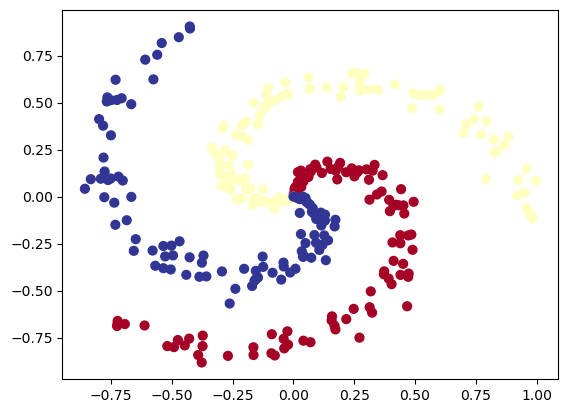

In [16]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [17]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split


In [18]:
# Let's calculuate the accuracy for when we fit our model
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
# acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
# acc_fn

In [19]:
# Prepare device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing `nn.Module`



# Instantiate model and send it to device


In [20]:
# Setup data to be device agnostic


# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##

print("Pred probs:")
## Your code here ##

print("Pred labels:")
## Your code here ##

Logits:
Pred probs:
Pred labels:


In [21]:
# Setup loss function and optimizer
# loss_fn =
# optimizer = 

In [22]:
# Build a training loop for the model

# Loop over data


  ## Training
  
  # 1. Forward pass
  

  # 2. Calculate the loss
  
  
  # 3. Optimizer zero grad
  

  # 4. Loss backward
  

  # 5. Optimizer step
  

  ## Testing
  

    # 1. Forward pass
    
    # 2. Caculate loss and acc
    
  # Print out what's happening every 100 epochs
  

In [23]:
# Plot decision boundaries for training and test sets
